In [ ]:
!export HTTP_PROXY="http://10.68.69.53:80"
!export HTTPS_PROXY="http://10.68.69.53:80"

!export http_proxy="http://10.68.69.53:80"
!export https_proxy="http://10.68.69.53:80"

In [ ]:
import torch
from src.dataLoader import Loader
from src.plots import Plots
from src.model import Model_loader
from src.optimise import learner

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_transform,test_transform = Loader.transform()
train_data,test_data = Loader.Loader(train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified


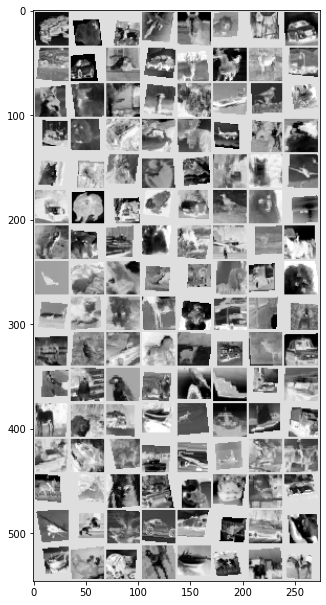

In [ ]:
Plots.sampleVisual(train_data)

In [ ]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [ ]:
model = Model_loader.models(device)
(ln_train_acc, ln_train_losses, ln_test_acc, ln_test_losses), ln_model= learner(model, train_data, test_data,0 , 4, device)

  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------
None
Epoch 1:


Loss=2.0769622325897217 Batch_id=390 Accuracy=19.51: 100%|██████████| 391/391 [00:25<00:00, 15.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -0.7633, Accuracy: 13934/50000 (27.87%)

Epoch 2:


Loss=1.7871456146240234 Batch_id=390 Accuracy=30.08: 100%|██████████| 391/391 [00:25<00:00, 15.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -1.4192, Accuracy: 19197/50000 (38.39%)

Epoch 3:


Loss=1.7145259380340576 Batch_id=390 Accuracy=35.91: 100%|██████████| 391/391 [00:25<00:00, 15.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -1.6448, Accuracy: 21258/50000 (42.52%)

Epoch 4:


Loss=1.5251268148422241 Batch_id=390 Accuracy=38.38: 100%|██████████| 391/391 [00:25<00:00, 15.54it/s]



Test set: Average loss: -1.9351, Accuracy: 21047/50000 (42.09%)



In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = ln_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 45 %
Accuracy of   car : 47 %
Accuracy of  bird : 10 %
Accuracy of   cat : 40 %
Accuracy of  deer : 29 %
Accuracy of   dog : 27 %
Accuracy of  frog : 50 %
Accuracy of horse : 40 %
Accuracy of  ship : 67 %
Accuracy of truck : 62 %
